<a href="https://colab.research.google.com/github/MrEwdew/DeepLearning25/blob/main/week_1/CIFAR10-ShallowLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: CIFAR10 Challenge

**CIFAR10** (http://www.cs.toronto.edu/~kriz/cifar.html) is one of the most famous ML data sets.

## Data
* 32x32 color images
* in 10 classes
* 50k training images
* 10k test images



<img src="https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width=700>

In [71]:
#get data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [72]:
#traindata: 50k 32X32 rgb images
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
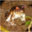

In [73]:
X_train[0]

In [74]:
#labels
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [75]:
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

## Task: build the best classifier (with feature extration) using the methods you know from ML1+2
* work in small teams (2-4)
* use NumPy pre-processing, feature extraction and hyer-parameter tuning in Scikit-Learn
* no Neural Networks!
* best test F1-Score winns!

In [113]:
import numpy as np

In [77]:

im_R = X_train.copy()
im_R[:,:, :, (1, 2)] = 0
im_G = X_train.copy()
im_G[:,:, :, (0, 2)] = 0
im_B = X_train.copy()
im_B[:,:, :, (0, 1)] = 0

array([[[ 59,   0,   0],
        [ 43,   0,   0],
        [ 50,   0,   0],
        ...,
        [158,   0,   0],
        [152,   0,   0],
        [148,   0,   0]],

       [[ 16,   0,   0],
        [  0,   0,   0],
        [ 18,   0,   0],
        ...,
        [123,   0,   0],
        [119,   0,   0],
        [122,   0,   0]],

       [[ 25,   0,   0],
        [ 16,   0,   0],
        [ 49,   0,   0],
        ...,
        [118,   0,   0],
        [120,   0,   0],
        [109,   0,   0]],

       ...,

       [[208,   0,   0],
        [201,   0,   0],
        [198,   0,   0],
        ...,
        [160,   0,   0],
        [ 56,   0,   0],
        [ 53,   0,   0]],

       [[180,   0,   0],
        [173,   0,   0],
        [186,   0,   0],
        ...,
        [184,   0,   0],
        [ 97,   0,   0],
        [ 83,   0,   0]],

       [[177,   0,   0],
        [168,   0,   0],
        [179,   0,   0],
        ...,
        [216,   0,   0],
        [151,   0,   0],
        [123,   0,   0]]], dtype=uint8)
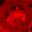

In [78]:
im_R[0]

array([[[  0,  62,   0],
        [  0,  46,   0],
        [  0,  48,   0],
        ...,
        [  0, 132,   0],
        [  0, 125,   0],
        [  0, 124,   0]],

       [[  0,  20,   0],
        [  0,   0,   0],
        [  0,   8,   0],
        ...,
        [  0,  88,   0],
        [  0,  83,   0],
        [  0,  87,   0]],

       [[  0,  24,   0],
        [  0,   7,   0],
        [  0,  27,   0],
        ...,
        [  0,  84,   0],
        [  0,  84,   0],
        [  0,  73,   0]],

       ...,

       [[  0, 170,   0],
        [  0, 153,   0],
        [  0, 161,   0],
        ...,
        [  0, 133,   0],
        [  0,  31,   0],
        [  0,  34,   0]],

       [[  0, 139,   0],
        [  0, 123,   0],
        [  0, 144,   0],
        ...,
        [  0, 148,   0],
        [  0,  62,   0],
        [  0,  53,   0]],

       [[  0, 144,   0],
        [  0, 129,   0],
        [  0, 142,   0],
        ...,
        [  0, 184,   0],
        [  0, 118,   0],
        [  0,  92,   0]]], dtype=uint8)
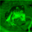

In [79]:
im_G[0]

array([[[  0,   0,  63],
        [  0,   0,  45],
        [  0,   0,  43],
        ...,
        [  0,   0, 108],
        [  0,   0, 102],
        [  0,   0, 103]],

       [[  0,   0,  20],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,  55],
        [  0,   0,  50],
        [  0,   0,  57]],

       [[  0,   0,  21],
        [  0,   0,   0],
        [  0,   0,   8],
        ...,
        [  0,   0,  50],
        [  0,   0,  50],
        [  0,   0,  42]],

       ...,

       [[  0,   0,  96],
        [  0,   0,  34],
        [  0,   0,  26],
        ...,
        [  0,   0,  70],
        [  0,   0,   7],
        [  0,   0,  20]],

       [[  0,   0,  96],
        [  0,   0,  42],
        [  0,   0,  30],
        ...,
        [  0,   0,  94],
        [  0,   0,  34],
        [  0,   0,  34]],

       [[  0,   0, 116],
        [  0,   0,  94],
        [  0,   0,  87],
        ...,
        [  0,   0, 140],
        [  0,   0,  84],
        [  0,   0,  72]]], dtype=uint8)
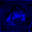

In [80]:
im_B[0]

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)
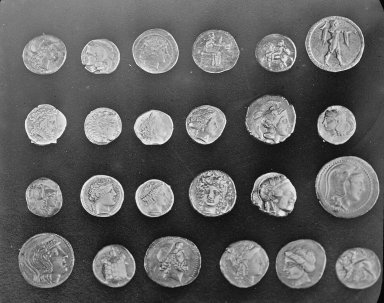

In [81]:
image

In [82]:
import cv2

X_train_gray = []
for elem in X_train:
  X_train_gray += [cv2.cvtColor(elem, cv2.COLOR_BGR2GRAY)]

In [116]:
X_train_gray = np.array(X_train_gray)

array([[ 62,  45,  47, ..., 128, 121, 120],
       [ 20,   0,   7, ...,  82,  77,  82],
       [ 23,   6,  24, ...,  78,  78,  68],
       ...,
       [152, 123, 125, ..., 117,  27,  32],
       [131, 104, 115, ..., 136,  58,  51],
       [139, 123, 130, ..., 174, 112,  90]], dtype=uint8)
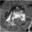

In [84]:
X_train_gray[0]

In [88]:
import skimage as ski

image = ski.data.coins()
# ... or any other NumPy array!
edges = ski.filters.sobel(X_train_gray)
edges.shape
#ski.io.imshow(edges)
#ski.io.show()

(50000, 32, 32)

In [111]:

edges_flat = []
for elem in edges:
  edges_flat += [elem.flatten("C")]
edges_flat = np.array(edges_flat)
edges_flat.shape

(50000, 1024)

In [112]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc = dc.fit(edges_flat,y_train)

In [117]:
import cv2
import skimage as ski
import numpy as np

def ausgrauenflach(daten):
  gray = []
  for elem in daten:
    gray += [cv2.cvtColor(elem, cv2.COLOR_BGR2GRAY)]
  gray = np.array(gray)
  ecken = ski.filters.sobel(gray)
  ecken_flat = []
  for elem in edges:
    ecken_flat += [elem.flatten("C")]
  return np.array(edges_flat)

test = ausgrauenflach(X_test)

In [118]:
y_pred = dc.predict(test)

In [120]:
print("Results Using Gini Index:")
cal_accuracy(y_test, y_pred)

Results Using Gini Index:


NameError: name 'cal_accuracy' is not defined